## DTs and CV Lecture 6 Marisol De La Cruz

In [5]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

## Work Period 6 Questions ##

>  1. Copy the code from the slides provided during the lecture to fit a decision tree using the tennis dataset. After fitting the tree, use the model to predict the outcome (Yes/No) for the following novel instances:

* Instance 1: Outlook = Overcast, Temperature = Hot, Humidity = High, Windy = True
* Instance 2: Outlook = Rainy, Temperature = Mild, Humidity = Normal, Windy = False
* Instance 3: Outlook = Sunny, Temperature = Cool, Humidity = High, Windy = TrueTrue



In [57]:
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Cool', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'High'],
    'Windy': [False, True, False, False, True, False, False, False, False, True, False, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']
})

In [58]:
data_encoded = pd.get_dummies(data.drop('PlayTennis', axis=1))
target = data['PlayTennis'].map({'Yes': 1, 'No': 0})

In [59]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(data_encoded, target)

DecisionTreeClassifier()

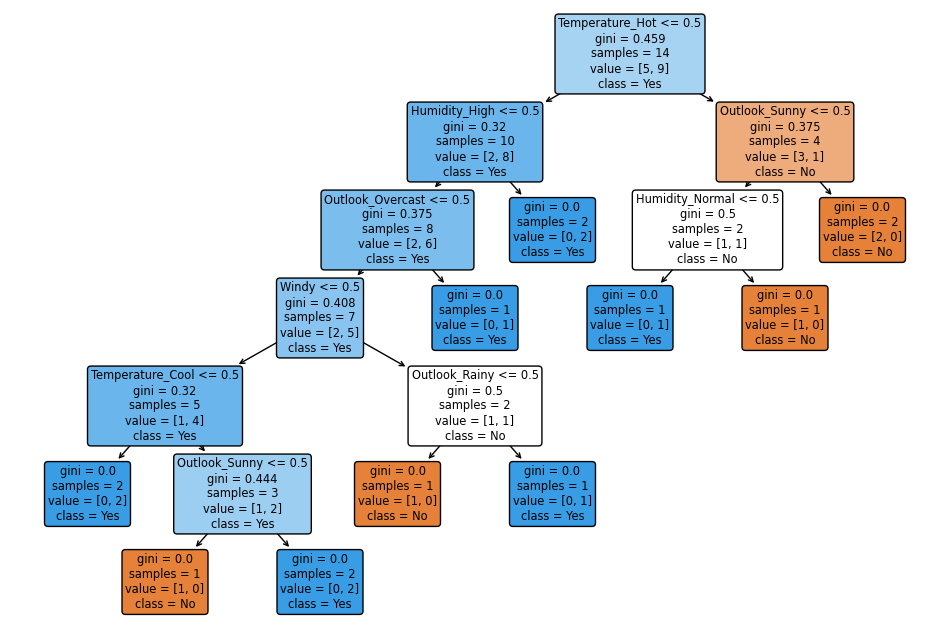

In [60]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data_encoded.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

In [61]:
instances = {
    "Instance 1": {
        "Outlook": "Overcast",
        "Temperature": "Hot",
        "Humidity": "High",
        "Windy": True
    },
    "Instance 2": {
        "Outlook": "Rainy",
        "Temperature": "Mild",
        "Humidity": "Normal",
        "Windy": False
    },
    "Instance 3": {
        "Outlook": "Sunny",
        "Temperature": "Cool",
        "Humidity": "High",
        "Windy": True
    }
}

# Printing the instances
for instance, attributes in instances.items():
    print(f"{instance}: {attributes}")

Instance 1: {'Outlook': 'Overcast', 'Temperature': 'Hot', 'Humidity': 'High', 'Windy': True}
Instance 2: {'Outlook': 'Rainy', 'Temperature': 'Mild', 'Humidity': 'Normal', 'Windy': False}
Instance 3: {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Windy': True}


In [62]:
new_data_encoded = pd.get_dummies(pd.DataFrame(instances))
new_data_encoded = new_data_encoded.reindex(columns=data_encoded.columns, fill_value=0)

In [63]:
prediction = clf.predict(new_data_encoded)
result = 'Yes' if prediction[0] == 1 else 'No'
print(f"The predicted outcome is: {result}")

The predicted outcome is: Yes


>  2.	Interpret the second left-most node in the tree generated in class in a similar way to what was done during the lecture.


![Picture1](./Picture1.png)	


* a) What is the decision rule at this node?
* b) For Temperature_Hot = 0, what does this indicate about the temperature? What branch will be followed?
* c) For Temperature_Hot = 1, what branch is followed?
* d) What does the Gini value indicate here? Is the set pure? What is the maximum Gini for 2 classes?
* e) How many samples reach this node, and what is the class distribution?
* f) What does class = No indicate for instances reaching this node?

a) if temperature > 0.5 rigth. if temperature < 0.5 left. 

b) The value "0" is typically assigned to the negative or absent condition of a binary feature, therefore the tree will still be branching to the right side

c) The value "1" typically signifies the positive or present condition of a binary feature,  therefore the tree will still be branching to the left side

d) The Gini value at a node in a decision tree It quantifies how mixed the classes are. Specifically, the Gini impurity. The max gini for 2 classes is 0.5

e) 10 samples reach this node
The class distribution is even 0.5 to each class meaning that they are equally divide in 50% each

f) If we have a dataset predicting whether to play tennis based on weather conditions and the decision tree classifies instances at this node as "No", it could mean that, given the features (like temperature, humidity, etc.), the decision is to not play tennis under those conditions.

>  3.	 A decision tree node has 10 data points, 4 of which belong to class A and 6 to class B. Calculate the Gini impurity for this node.



In [65]:
total_data_points = 10
class_a_count = 4
class_b_count = 6

gini_impurity = 1 - ( (class_a_count / total_data_points)**2 + (class_b_count / total_data_points)**2 )

print(f"The Gini impurity for the node is: {gini_impurity:.4f}")

The Gini impurity for the node is: 0.4800


>  4.  What are two common stopping criteria that can help prevent overfitting?aet.


* Maximum Depth: It limits the tree's growth by how further the tree can grow.
* Min Sample Leaf: It specifies a certain amount of sample per leaf in order to split so it doesn't branch too much memorizing data

> 5.	Create a new decision tree for this data except use entropy instead of gini. Repeat question 1 with the new tree you have created.


In [66]:
data2 = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Cool', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'High'],
    'Windy': [False, True, False, False, True, False, False, False, False, True, False, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']
}

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data2)

# Now you can use the drop method
data_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))
target = df['PlayTennis'].map({'Yes': 1, 'No': 0})

In [67]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(data_encoded, target)

DecisionTreeClassifier(criterion='entropy')

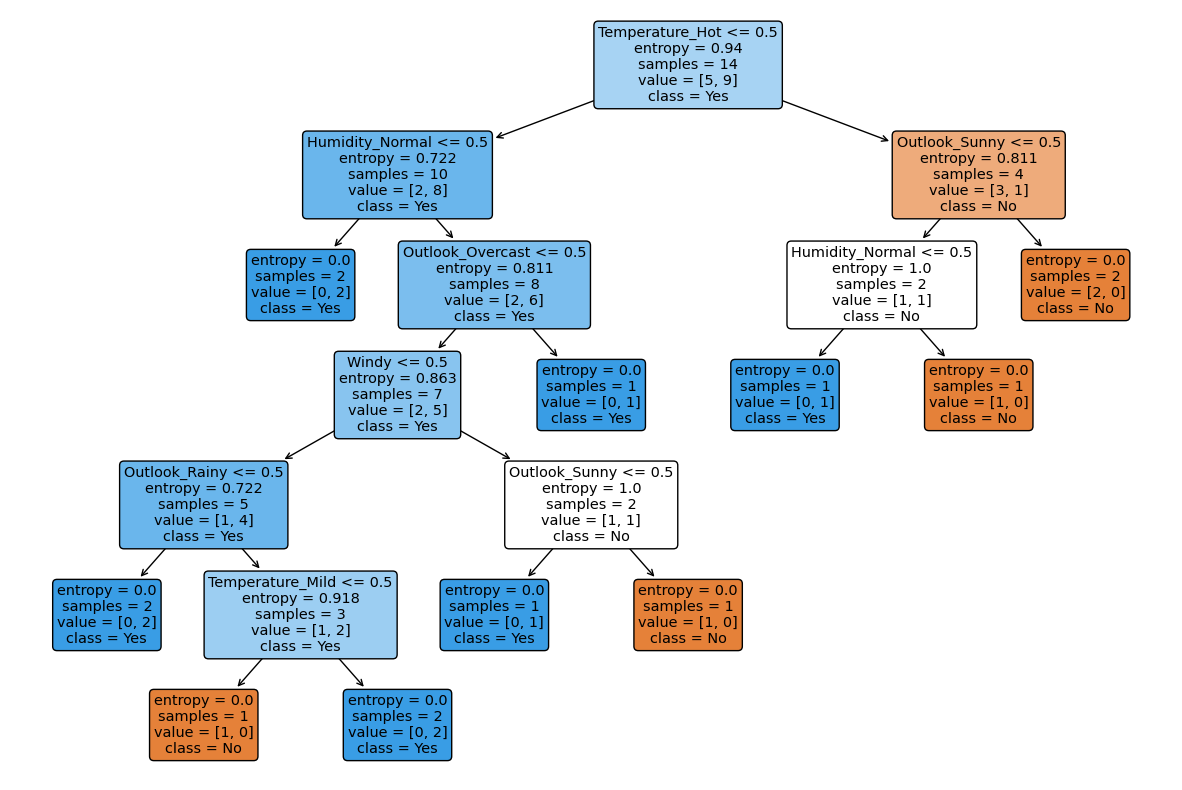

In [68]:
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, feature_names=data_encoded.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

In [69]:
prediction = clf_entropy.predict(new_data_encoded)
result = 'Yes' if prediction[0] == 1 else 'No'
print(f"The predicted outcome is: {result}")

The predicted outcome is: Yes
